In [2]:
import sys
sys.path.append( '../utilities' )
from data_engine import DataEngine
from backtesting import Backtesting
import pandas as pd
import ta
import ccxt
import json
f = open('../config/pair_list.json',)
pairJson = json.load(f)
f.close()

In [5]:
pairList = pairJson['ftxClassicPair']
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

#dataEngine = DataEngine(session=ccxt.hitbtc())
dataEngine = DataEngine(session=ccxt.binance(), path_to_data='./database/')

dfList = []
for pair in pairList:
    df = dataEngine.get_historical_from_db(pair, timeframe, startDate)
    dfList.append(df)

print("Data load 100%")
dfList[0]

Successfully load 12287 candles for AVAXUSDT
Successfully load 13295 candles for SOLUSDT
Successfully load 37413 candles for BNBUSDT
Successfully load 18926 candles for FTTUSDT
Successfully load 13110 candles for DOTUSDT
Successfully load 39349 candles for BTCUSDT
Successfully load 39349 candles for ETHUSDT
Successfully load 36525 candles for LTCUSDT
Successfully load 27003 candles for LINKUSDT
Successfully load 11738 candles for AAVEUSDT
Successfully load 12410 candles for UNIUSDT
Successfully load 12786 candles for SUSHIUSDT
Successfully load 22937 candles for DOGEUSDT
Successfully load 33145 candles for XRPUSDT
Successfully load 13288 candles for SRMUSDT
Successfully load 19447 candles for BCHUSDT
Successfully load 32230 candles for TRXUSDT
Data load 100%


,open,high,low,close,volume
timestamp,,,,,
2020-09-22 06:00:00,0.8500,6.0000,0.850,4.8811,3198372.67
2020-09-22 07:00:00,4.8800,5.3500,4.245,4.9096,3171013.60
2020-09-22 08:00:00,4.9096,6.9289,4.820,6.8219,3883981.43
2020-09-22 09:00:00,6.8299,7.0000,5.550,6.2108,3681832.89
2020-09-22 10:00:00,6.2109,6.3000,4.975,5.4901,2729116.18
...,...,...,...,...,...
2022-02-16 18:00:00,92.0600,93.1800,91.740,92.9500,73671.41
2022-02-16 19:00:00,92.9600,96.0700,92.500,95.8500,273219.95
2022-02-16 20:00:00,96.1500,96.2400,94.880,95.2600,101882.50


In [6]:
# -- Indicator variable --
stochWindow = 14
willWindow = 14

# -- Drop all columns we do not need --
for df in dfList:
    # -- Drop all columns we do not need --
    df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

    # -- Indicators, you can edit every value --    
    df['EMA1']=ta.trend.ema_indicator(close=df['close'], window=7)
    df['EMA2']=ta.trend.ema_indicator(close=df['close'], window=30)
    df['EMA3']=ta.trend.ema_indicator(close=df['close'], window=50)
    df['EMA4']=ta.trend.ema_indicator(close=df['close'], window=100)
    df['EMA5']=ta.trend.ema_indicator(close=df['close'], window=121)
    df['EMA6']=ta.trend.ema_indicator(close=df['close'], window=200)

    df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=stochWindow, smooth1=3, smooth2=3)
    df['WillR'] = ta.momentum.williams_r(high=df['high'], low=df['low'], close=df['close'], lbp=willWindow)

print("Indicators loaded 100%")
dfList[0]

Indicators loaded 100%


,open,high,low,close,volume,EMA1,EMA2,EMA3,EMA4,EMA5,EMA6,STOCH_RSI,WillR
timestamp,,,,,,,,,,,,,
2020-09-22 06:00:00,0.8500,6.0000,0.850,4.8811,3198372.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-22 07:00:00,4.8800,5.3500,4.245,4.9096,3171013.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-22 08:00:00,4.9096,6.9289,4.820,6.8219,3883981.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-22 09:00:00,6.8299,7.0000,5.550,6.2108,3681832.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-22 10:00:00,6.2109,6.3000,4.975,5.4901,2729116.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-16 18:00:00,92.0600,93.1800,91.740,92.9500,73671.41,93.037169,91.796407,89.819639,87.254765,86.679646,84.990687,0.107432,-74.450085
2022-02-16 19:00:00,92.9600,96.0700,92.500,95.8500,273219.95,93.740377,92.057929,90.056124,87.424967,86.829980,85.098740,0.388142,-25.380711
2022-02-16 20:00:00,96.1500,96.2400,94.880,95.2600,101882.50,94.120283,92.264514,90.260197,87.580117,86.968177,85.199847,0.307006,-35.363790


In [7]:
dfTestList = []
for df in dfList:
    dfTestList.append(df.loc['2021-01-01':])

# -- Starting value --
startingBalance = 1000
makerFee = 0
takerFee = 0.0007

# -- Rules --
StopLossActivation = False
takeProfitActivation = False
showLog = False

# -- Hyper parameters --
stochOverBought = 0.82
stochOverSold = 0.25
SlPct = 0.015
TpPct = 0.15
willOverSold = -85
willOverBought = -10
maxPositions = 3

# -- Trade Functions --

# -- Condition to BUY market --
def buyCondition(row, previousRow=None):
    if (
        row['EMA1'] > row['EMA2']
        and row['EMA2'] > row['EMA3']
        and row['EMA3'] > row['EMA4']
        and row['EMA4'] > row['EMA5']
        and row['EMA5'] > row['EMA6']
        and row['STOCH_RSI'] < stochOverBought
    ):
        return True
    else:
        return False

# -- Condition to SELL market --
def sellCondition(row, previousRow=None):
    if row['EMA2'] > row['EMA1'] and row['STOCH_RSI'] > stochOverSold:
        return True
    else:
        return False
            

# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
stopLoss = [0] * len(pairList)
takeProfit = [5000000] * len(pairList)
walletCoinArray = [0] * len(pairList)
walletUsdArray = [0] * len(pairList)
activePositions = 0
lastIndex = dfTestList[0].index.values[1]

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'symbol','position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet'])

# # -- Iteration on all your price dataset (df) --
for index, row in dfTestList[0].iterrows():
    # -- Check if you have one coin in your wallet --
    if (walletCoinArray.count(0) == len(walletCoinArray)) == False:
        # -- Iteration on all coin (upgrade possible: only check coin in your wallet) --
        for i in range(0,len(dfTestList)):
            # -- Check if you have more than 0 coin --
            if walletCoinArray[i] != 0:
                try:
                    actualRow = dfTestList[i].loc[index]
                    previousRow = dfTestList[i].loc[lastIndex]
                    # -- Stop Loss --
                    if sellCondition(actualRow,previousRow):
                        sellPrice = actualRow['close']
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = takerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell", pairList[i],"at", sellPrice, '$ the', index)

                        # -- Add the trade to DfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Market Order',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)
                except:
                    pass
    # -- Buy market order --
    # -- Check if you can open a new position --
    if activePositions < maxPositions:
        # -- Check buy condition for each coin of list --
        for i in range(0,len(dfTestList)):
            try:
                actualRow = dfTestList[i].loc[index]
                previousRow = dfTestList[i].loc[lastIndex]
                # -- Buy condition --
                if buyCondition(actualRow, previousRow) and activePositions < maxPositions and walletCoinArray[i]==0 :
                    buyPrice = actualRow['close']
                    # -- Define size of the position --
                    usdMultiplier = 1/(maxPositions-activePositions)
                    fee = takerFee * usd * usdMultiplier
                    usd = usd - fee
                    coin = (usd * usdMultiplier) / buyPrice
                    usd = usd - (usd * usdMultiplier)
                    # -- Set coin and equivalent usd to size of position after open position --
                    walletCoinArray[i] = coin
                    walletUsdArray[i] = coin * actualRow['close']
                    activePositions += 1
                    # -- Create a Stop Loss --
                    if StopLossActivation:
                        stopLoss[i] = buyPrice - SlPct * buyPrice
                    # -- Create a Take Profit --
                    if takeProfitActivation:
                        takeProfit[i] = buyPrice + TpPct * buyPrice

                    # -- LOG --
                    if showLog:
                        print("Buy", pairList[i],"at", buyPrice, '$ the', index)

                    # -- Add the trade to dfTrades to analyse it later --
                    myrow = {
                        'date': index,
                        'symbol': pairList[i],
                        'position': "Buy",
                        'reason': 'Buy Market Order',
                        'price': buyPrice,
                        'frais': fee,
                        'fiat': usd,
                        'coins': coin,
                        'wallet': sum(walletUsdArray) + usd
                    }
                    dfTrades = dfTrades.append(myrow, ignore_index=True)
            except:
                pass

    # -- Keep last index to define last row --            
    lastIndex = index

print("Final wallet", sum(walletUsdArray) + usd)


Final wallet 13815.94512340628


In [9]:
BTobject = Backtesting()
newDf = BTobject.multi_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTestList[0], pairList=pairList, timeframe=timeframe)

Trading Bot on : 17 coins | Timeframe : 1h
Period : [2021-01-01 00:00:00] -> [2022-02-16 22:00:00]
Starting balance : 999.7666666666667 $

----- General Informations -----
Final balance : 13815.95 $
Performance vs US Dollar : 1281.92 %
Bitcoin Buy and Hold Performence : 2852.77 %
Performance vs Buy and Hold : -53.2 %
Best trade : +74.96 %, the 2021-01-30 09:00:00
Worst trade : -9.34 %, the 2021-12-04 07:00:00
Worst drawDown : - 40.28 %
Total fees :  3476.25 $

----- Trades Informations -----
Total trades on period : 568
Number of positive trades : 235
Number of negative trades :  333
Trades win rate ratio : 41.37 %
Average trades performance : 0.58 %
Average positive trades : 3.21 %
Average negative trades : -1.27 %

----- Trades Reasons -----
Buy Market Order     571
Sell Market Order    568
Name: reason, dtype: int64

----- Pair Result -----
-----------------------------------------------------------------------------------------------
Trades      Pair     Sum-result     Mean-trade  

In [10]:
newDf.iloc[-5:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet,resultat,resultat%,tradeIs,walletAth,drawDown,drawDownPct
date,,,,,,,,,,,,,,,
2022-02-15 13:00:00,2022-02-15 13:00:00,XRP/USDT,Buy,Buy Market Order,0.8307,3.238880,0.000000,5566.067243,13879.293943,NaN,NaN,,21560.623216,7681.329273,0.356267
2022-02-16 18:00:00,2022-02-16 18:00:00,XRP/USDT,Sell,Sell Market Order,0.8241,3.210897,4583.785118,0.000000,13839.347002,-39.946941,-0.287817,Bad,21560.623216,7721.276214,0.358119
2022-02-16 18:00:00,2022-02-16 18:00:00,AVAX/USDT,Buy,Buy Market Order,92.9500,3.208650,0.000000,49.280005,13836.138352,NaN,NaN,,21560.623216,7724.484863,0.358268
2022-02-16 19:00:00,2022-02-16 19:00:00,BCH/USDT,Sell,Sell Market Order,336.0000,3.230399,4611.625855,0.000000,13819.173262,-16.965091,-0.122614,Bad,21560.623216,7741.449954,0.359055
2022-02-16 19:00:00,2022-02-16 19:00:00,FTT/USDT,Buy,Buy Market Order,46.8100,3.228138,0.000000,98.449001,13815.945123,NaN,NaN,,21560.623216,7744.678092,0.359205


----- 2021 Performances: 1647.25% -----


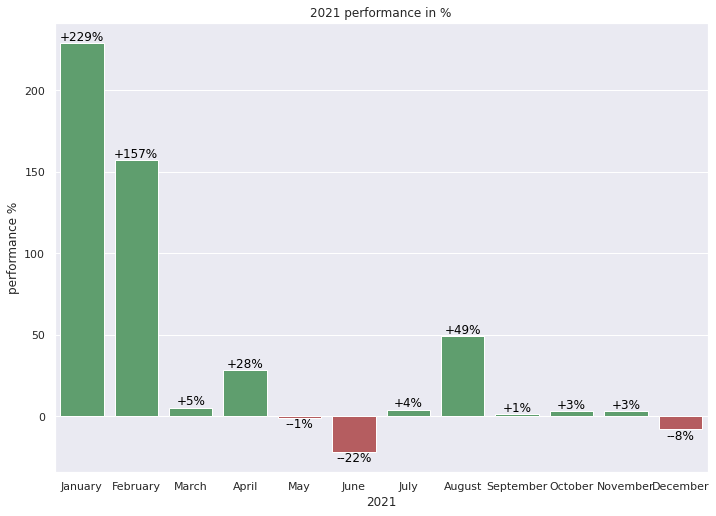

----- 2022 Performances: -19.64% -----


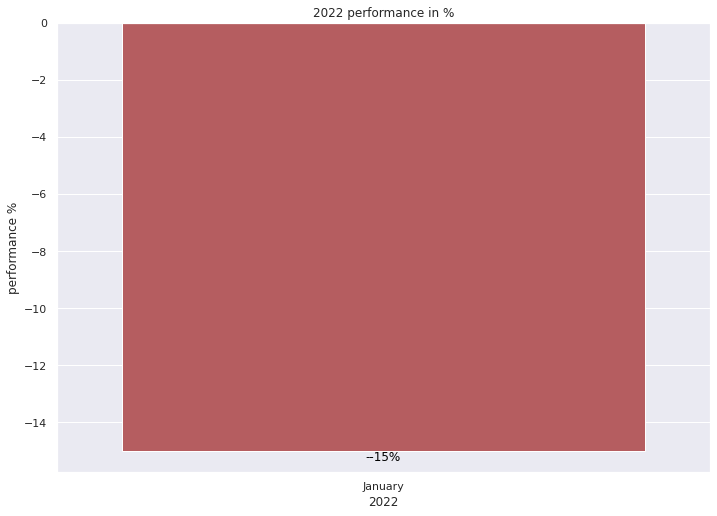

In [11]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)


----- Plot -----


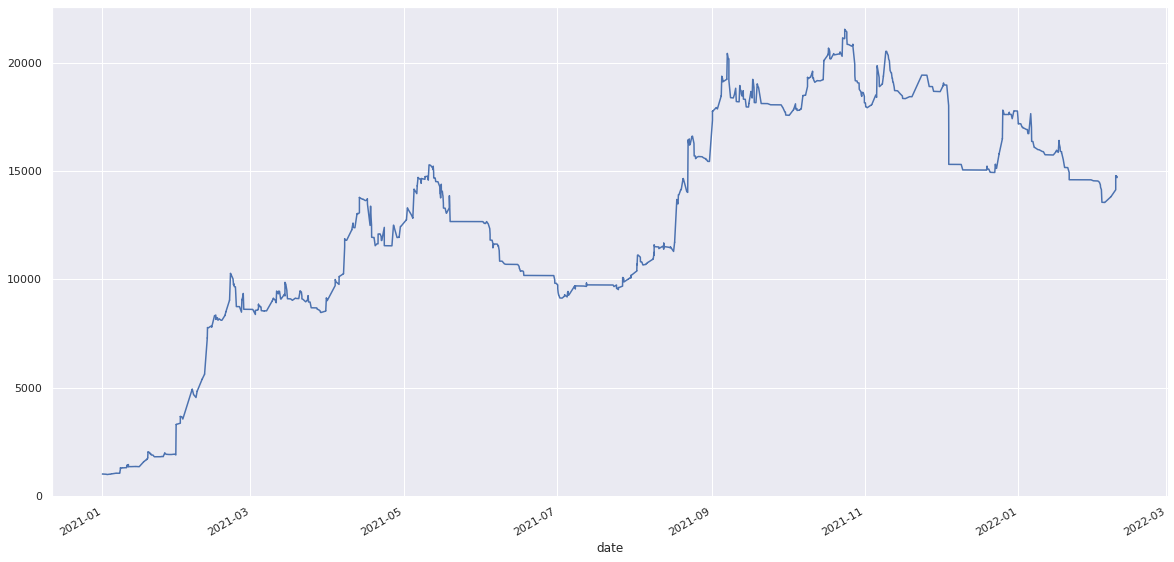

In [129]:
BTobject.plot_wallet_evolution(dfTrades=dfTrades)

In [130]:
dfTrades.iloc[-10:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet
1105,2022-02-08 20:00:00,TRX/USDT,Sell,Sell Market Order,0.06795,3.411652,14790.534557,0.000000,14790.534557
1106,2022-02-08 20:00:00,AVAX/USDT,Buy,Buy Market Order,87.99000,3.451125,9858.055621,56.018045,14787.083432
1107,2022-02-08 20:00:00,XRP/USDT,Buy,Buy Market Order,0.85220,3.450319,4927.302651,5781.861829,14783.633112
1108,2022-02-09 01:00:00,BTC/USDT,Buy,Buy Market Order,43861.21000,3.449112,0.000000,0.112260,14780.184001
1109,2022-02-09 04:00:00,BTC/USDT,Sell,Sell Market Order,43453.49000,3.414658,4874.668289,0.000000,14730.998750
1110,2022-02-09 04:00:00,AAVE/USDT,Buy,Buy Market Order,178.90000,3.412268,0.000000,27.228932,14727.586482
1111,2022-02-09 06:00:00,AAVE/USDT,Sell,Sell Market Order,180.30000,3.436564,4905.939963,0.000000,14762.270424
1112,2022-02-09 07:00:00,BTC/USDT,Buy,Buy Market Order,43807.75000,3.434158,0.000000,0.111910,14758.836266
1113,2022-02-09 08:00:00,BTC/USDT,Sell,Sell Market Order,43399.78000,3.399795,4853.450269,0.000000,14709.780730
1114,2022-02-09 08:00:00,UNI/USDT,Buy,Buy Market Order,12.10000,3.397415,0.000000,400.830814,14706.383315
